In [3]:
from parrot import py_predictor
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
%aimport AD_comparison_tools
%aimport AD_predictor_tools
%aimport ADpred_LambertTFs_helper
import seaborn as sns
import matplotlib.pyplot as plt


Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


In [11]:
seq = "MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKAYSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCKKIMVLYGGKAVKTNWVMHQYHLGIEEDEKEGDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICSDSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD"

In [12]:
# Classification - can use function below to convert it to probs as needed
erijman_train_predictor = py_predictor.Predictor("../models/AD_prediction_network.pt", 
                                                dtype="sequence")

# Regression
paddle_train_predictor = py_predictor.Predictor("../models/paddleTrain_AD_network.pt", 
                                                dtype="sequence")

In [4]:
# Used approach from https://github.com/idptools/parrot/blob/master/parrot/scripts/parrot_predict.py

def convert_logits_to_probs(logits):
    exp_vals = np.exp(logits)
    probs = exp_vals / np.sum(exp_vals)
    return np.around(probs, decimals=4)

In [37]:
erij_preds = []
padd_preds = []

for i in np.arange(0,len(seq) - 40, 5):
    # if i % 10 == 0:
    #     print(i)
    tile = seq[i: i + 40]
    erij_preds.append(erijman_train_predictor.predict(tile)[1])
    padd_preds.append(paddle_train_predictor.predict(tile)[0])

In [38]:
# erij_preds_df = pd.DataFrame(erij_preds)
# erij_preds_df

In [39]:
values = (0.3, 0.7)
softmax = np.exp(values)
np.around(softmax / np.sum(softmax))
#pred_dict[seq] = list(np.around(softmax / np.sum(softmax), decimals=4))

array([0., 1.])

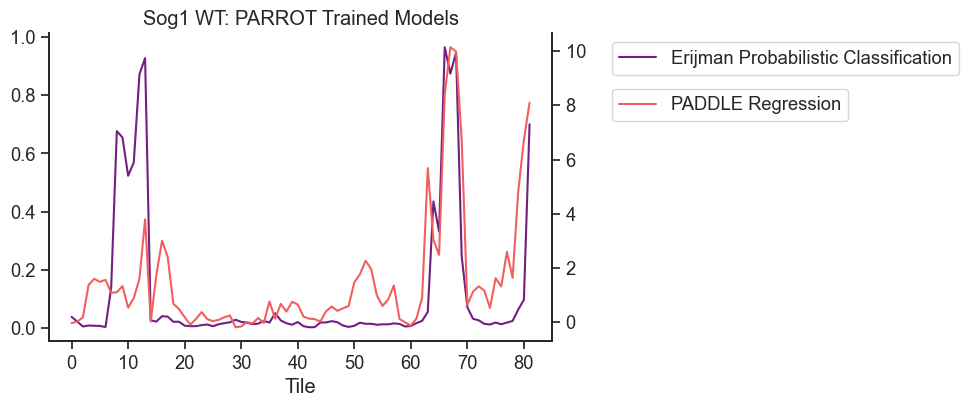

In [40]:
palette = sns.color_palette('magma', 2)
ax = sns.lineplot(erij_preds, label = "Erijman Probabilistic Classification", color = palette[0])
ax2 = ax.twinx()
sns.lineplot(padd_preds, ax = ax2, color = palette[1], label = "PADDLE Regression")
ax.legend(bbox_to_anchor = (1.1,1))
ax2.legend(bbox_to_anchor = (1.1,0.85))
sns.despine(right = False)
plt.title("Sog1 WT: PARROT Trained Models")
ax.set_xlabel("Tile");

In [41]:
# Run on erijman data

In [6]:
erijman = pd.read_csv("../data/1-s2.0-S1097276520302628-mmc2.csv")
erijman

,#,sequence,background,bin1,bin2,bin3,bin4,enrichmen_score,AD_set
0,0,MFGDVSDDSGDGFYDEIIALIVSADDKTRT,2,0,17,10,0,3.08,AD_positive
1,1,RVGIGDGGIAIVDSVFDNLDNFFVNILAMM,1,2,0,17,106,5.60,AD_positive
2,2,ECDSPREAFDVNDYYNWGEVVKGGAIGMLS,0,0,19,31,0,4.91,AD_positive
3,3,IGDCVFNATSLYLYEDSNDEWNVLVWKAGE,1,0,1,46,0,4.30,AD_positive
4,4,AYRFLATEWARDSSALFCEFGIESCRYGWT,5,11,58,56,1,3.94,AD_positive
...,...,...,...,...,...,...,...,...,...
1054330,1054330,SGELVTLNEECSGPEKAIRGSIDAAKRSTE,1,0,0,0,0,-5.30,AD_negative
1054331,1054331,SDTDRCHNWDSSYFWGSSWHTSVPRLACCW,2,0,0,0,0,-5.70,AD_negative
1054332,1054332,STDVAATYPNSATRTARRAGETSIEDDGYC,1,0,0,0,0,-5.30,AD_negative
1054333,1054333,NEWGVDVVVVVNCVIVPSVLSLSRLERWLK,1,0,0,0,0,-5.30,AD_negative


In [7]:
erijman["AD_set"].value_counts()

AD_set
AD_negative    1016412
AD_positive      37923
Name: count, dtype: int64

<Axes: xlabel='enrichmen_score', ylabel='Count'>

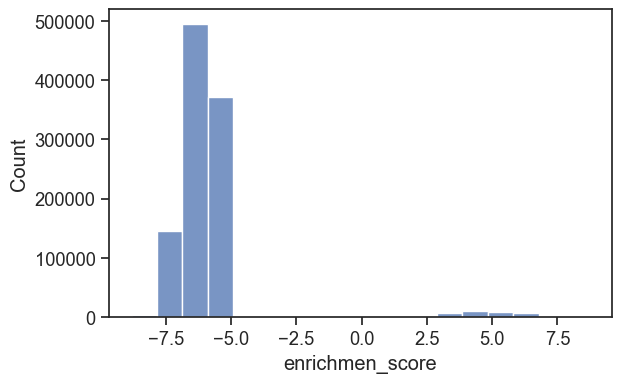

In [8]:
sns.histplot(erijman["enrichmen_score"], binwidth = 1)

In [9]:
erijman_sampled = erijman.sample(n=1000, random_state=42)
erijman_sampled

,#,sequence,background,bin1,bin2,bin3,bin4,enrichmen_score,AD_set
290946,290946,ASPFWYLDFYGGGGLARWPDSFGGNLHPRT,3,0,0,0,0,-5.99,AD_negative
773376,773376,TVLSRFVSSMAVGVLTAHRTLLNEDVVRYW,7,0,0,0,0,-6.68,AD_negative
450604,450604,GNIVKDVVSWGNMMNIELVRISNKRDSGKR,2,0,0,0,0,-5.70,AD_negative
122338,122338,GGERSLHIENLSGDHFDTLYVEARRLIRLS,5,0,0,0,0,-6.40,AD_negative
66784,66784,TVDDVSEQMKDLMNKSDIEKDLLEFSSYGV,1,0,0,0,0,-5.30,AD_negative
...,...,...,...,...,...,...,...,...,...
226413,226413,SYRRGCHWTGWRFPATYDWRSTSVPCTPTT,13,0,0,0,0,-7.24,AD_negative
92411,92411,TSCSDGFGLSHPVAISGSNKLYGGGPTVYM,7,0,0,0,0,-6.68,AD_negative
233187,233187,QLRASGDNRGYYQNCYRVCVKEPFSTRIWC,3,0,0,0,0,-5.99,AD_negative
174904,174904,DAKDNVRRDYYPALYCPAPVGIYDACFVNC,11,0,0,0,0,-7.09,AD_negative


In [13]:
erijman_sampled["AD_set"].value_counts()

AD_set
AD_negative    968
AD_positive     32
Name: count, dtype: int64

In [19]:
# Separate positive and negative examples
pos_erijman = erijman[erijman['AD_set'] == 'AD_positive'].sample(n=500, random_state=42)
neg_erijman = erijman[erijman['AD_set'] == 'AD_negative'].sample(n=500, random_state=42)

# Sample an equal number of negative examples
neg_sampled = neg_erijman.sample(n=len(pos_erijman), random_state=42)

# Combine the positive and sampled negative examples
balanced_erijman = pd.concat([pos_erijman, neg_sampled], ignore_index=True)
balanced_erijman["AD_set"].value_counts()

AD_set
AD_positive    500
AD_negative    500
Name: count, dtype: int64

In [20]:
erijman_sampled["parrot_pred"] = erijman_sampled["sequence"].apply(lambda seq: erijman_train_predictor.predict(seq)[1])
erijman_sampled

,#,sequence,background,bin1,bin2,bin3,bin4,enrichmen_score,AD_set,parrot_pred
290946,290946,ASPFWYLDFYGGGGLARWPDSFGGNLHPRT,3,0,0,0,0,-5.99,AD_negative,0.618676
773376,773376,TVLSRFVSSMAVGVLTAHRTLLNEDVVRYW,7,0,0,0,0,-6.68,AD_negative,0.058245
450604,450604,GNIVKDVVSWGNMMNIELVRISNKRDSGKR,2,0,0,0,0,-5.70,AD_negative,0.021900
122338,122338,GGERSLHIENLSGDHFDTLYVEARRLIRLS,5,0,0,0,0,-6.40,AD_negative,0.038068
66784,66784,TVDDVSEQMKDLMNKSDIEKDLLEFSSYGV,1,0,0,0,0,-5.30,AD_negative,0.130887
...,...,...,...,...,...,...,...,...,...,...
226413,226413,SYRRGCHWTGWRFPATYDWRSTSVPCTPTT,13,0,0,0,0,-7.24,AD_negative,0.081146
92411,92411,TSCSDGFGLSHPVAISGSNKLYGGGPTVYM,7,0,0,0,0,-6.68,AD_negative,0.050504
233187,233187,QLRASGDNRGYYQNCYRVCVKEPFSTRIWC,3,0,0,0,0,-5.99,AD_negative,0.029480
174904,174904,DAKDNVRRDYYPALYCPAPVGIYDACFVNC,11,0,0,0,0,-7.09,AD_negative,0.270724


In [21]:
balanced_erijman["parrot_pred"] = balanced_erijman["sequence"].apply(lambda seq: erijman_train_predictor.predict(seq)[1])
balanced_erijman

,#,sequence,background,bin1,bin2,bin3,bin4,enrichmen_score,AD_set,parrot_pred
0,19922,FPLRDTTIEVASCGIIDYTTLGVFCCSWFG,14,410,1673,1505,199,6.44,AD_positive,0.941547
1,465,NAGHDPYVLDKEQLVFACFIDDAVADLIRL,0,1,42,25,270,7.24,AD_positive,0.992362
2,32701,HDILSKGGVEKSSIGFRWVDVMDINVWDVS,6,0,58,1,0,2.83,AD_positive,0.906042
3,28218,DCNDGTWLELVQNLDSGPELGTYLNWNQLC,21,2,6,80,22,2.81,AD_positive,0.997561
4,37120,YRNRGFVYEAVAGGDMNMVDVTYELYAGFL,3,0,27,19,0,3.35,AD_positive,0.980246
...,...,...,...,...,...,...,...,...,...,...
995,868692,GYVGMYHRSKLRTWYVETSMTMRRNPQLTT,3,0,0,0,0,-5.99,AD_negative,0.039549
996,136048,RDNHNIKGKQRAINFAREWQDVYFLIEEMK,2,0,0,0,0,-5.70,AD_negative,0.412034
997,925873,CMRRLFASYCLNGDANATLDHHAGQAANYS,13,0,0,0,0,-7.24,AD_negative,0.030789
998,604313,SGYTQIIETIRCEKSFGRQKWAGRASVLRA,9,0,0,0,0,-6.91,AD_negative,0.028068


<Axes: xlabel='enrichmen_score', ylabel='Count'>

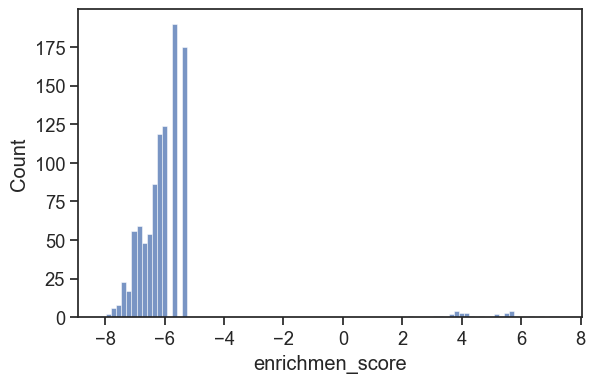

In [22]:
sns.histplot(erijman_sampled["enrichmen_score"])

Text(0.5, 29.249999999999986, 'Prediction')

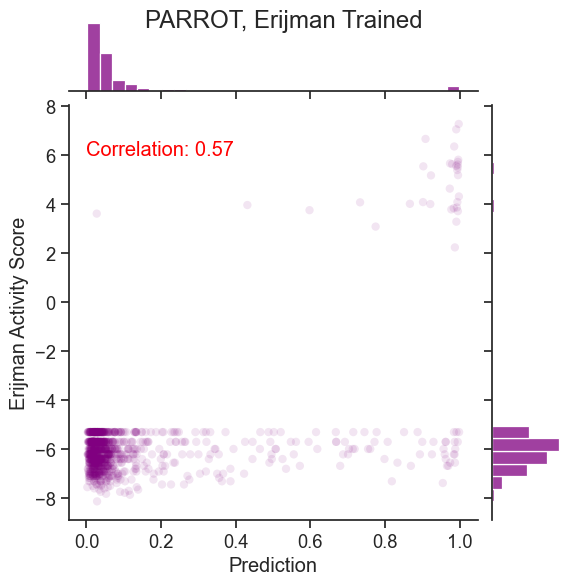

In [23]:
from scipy.stats import pearsonr

sns.jointplot(data=erijman_sampled, x="parrot_pred", y="enrichmen_score", 
              kind="scatter", color="purple", 
              marginal_kws=dict(bins=30, fill=True),     
              joint_kws = {'edgecolor' : 'none', 'alpha' : 0.1})
# Calculate Pearson correlation
correlation, _ = pearsonr(erijman_sampled["parrot_pred"], erijman_sampled["enrichmen_score"])
plt.text(s = f"Correlation: {correlation:.2f}", x = 0, y = 6, color = 'red')
plt.suptitle("PARROT, Erijman Trained")

plt.ylabel("Erijman Activity Score")
plt.xlabel("Prediction")

Text(0.5, 29.249999999999986, 'Prediction')

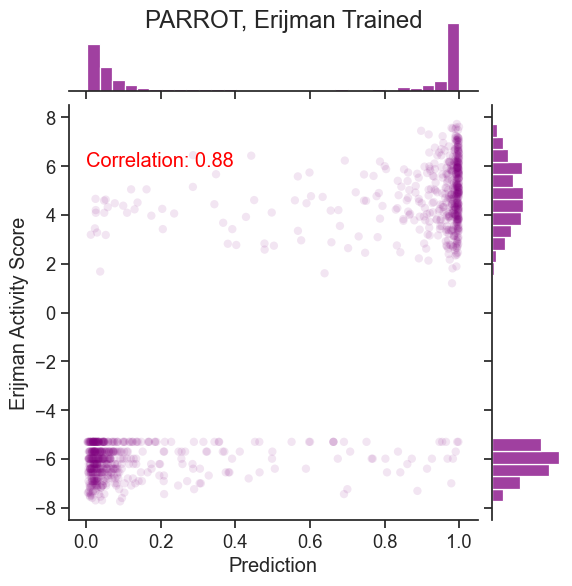

In [24]:
from scipy.stats import pearsonr

sns.jointplot(data=balanced_erijman, x="parrot_pred", y="enrichmen_score", 
              kind="scatter", color="purple", 
              marginal_kws=dict(bins=30, fill=True),     
              joint_kws = {'edgecolor' : 'none', 'alpha' : 0.1})
# Calculate Pearson correlation
correlation, _ = pearsonr(balanced_erijman["parrot_pred"], balanced_erijman["enrichmen_score"])
plt.text(s = f"Correlation: {correlation:.2f}", x = 0, y = 6, color = 'red')
plt.suptitle("PARROT, Erijman Trained")

plt.ylabel("Erijman Activity Score")
plt.xlabel("Prediction")

In [74]:
sanborn = pd.read_excel("../../synthetics/data/elife-68068-fig1-data1-v3.xlsx", sheet_name = "TF tiles, see Fig 1").dropna()
sanborn_sampled = sanborn.sample(n=1000, random_state=42)
sanborn_sampled["parrot_pred"] = sanborn_sampled["protein sequence"].apply(lambda seq: paddle_train_predictor.predict(seq)[0])
sanborn_sampled

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,num cells,"num cells, bin 1","num cells, bin 2",...,"num cells, bin 4","num cells, bin 5","num cells, bin 6","num cells, bin 7","num cells, bin 8",GFP average,GFP std,PADDLE split,DNA,parrot_pred
5243,A_tiles_P46974:477,GYMSSHHSPFDLGCFSHDKPTVSEFNLPSSFPNTIPSNSTTASNSY...,RSF2,P46974,477.0,2.124423,1.848761,11.057844,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,13.500000,1.000000,val5,GGGTACATGTCCAGCCACCACTCTCCATTCGACCTGGGCTGCTTTA...,2.317542
2131,A_tiles_P25611:428,LTDFEEYIEASSEYEKSSASESNVQMNDIVWNKYKFHVILSKLMSD...,RDS1,P25611,428.0,1.462625,0.932926,184.793700,0.109274,103.545674,...,9.985703,0.519236,0.503803,0.000000,0.0,9.294497,1.833688,test,CTGACAGACTTCGAGGAGTACATAGAAGCCTCCTCAGAGTATGAAA...,0.443903
6364,A_tiles_Q03833:104,NLAESLDSRISQGDFNDKTLKENCRVDSQQDCYDLAQLQILESDFW...,GIS1,Q03833,104.0,2.602655,2.346913,328.199905,0.764921,53.662356,...,88.990237,0.000000,0.000000,0.000000,0.0,16.539010,2.028078,val3,AACCTCGCCGAGAGTCTGGACTCTCGCATCTCCCAGGGCGACTTCA...,2.749727
6543,A_tiles_Q04411:282,FLHFYENNQELCHKLAKEFLVRSHFWIIPGGRKEIDVEYAHSHLFI...,URC2,Q04411,282.0,0.932395,-0.171746,276.103290,44.365415,196.510037,...,0.000000,0.000000,1.763309,0.000000,0.0,5.925061,1.743919,val7,TTCCTGCACTTCTACGAGAACAATCAGGAGCTGTGCCACAAGTTGG...,0.017309
2792,A_tiles_P34228:77,SRCEKIGLHCEINPQFRPKKGSQLQLLRQDVDEIKSKLDTLLANDS...,SEF1,P34228,77.0,1.334778,0.708504,250.788787,11.583089,130.754756,...,0.807667,1.038473,0.000000,1.264291,0.0,8.482074,1.856656,val6,TCCCGCTGCGAGAAGATCGGCCTGCATTGTGAGATCAATCCTCAGT...,0.426269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,A_tiles_P25364:498,KSSAPDVLTSATNSKFASSGLFGVDVYSVWKRATEKISDGNNTTDS...,HCM1,P25364,498.0,2.194506,1.928396,237.203295,0.655647,37.790392,...,27.974654,0.415389,1.007605,0.000000,0.0,13.945356,1.819349,val5,AAGTCAAGCGCCCCCGACGTGCTGACTAGTGCTACCAACTCTAAAT...,1.076324
7444,A_tiles_Q12244:635,SIHRLLIFQATLLVRLFYKKDTCDRSSAAMGMLNDRNGRLSRVIEK...,YLL054C,Q12244,635.0,1.045751,0.109761,375.103978,26.772233,272.090821,...,0.000000,0.000000,0.000000,0.000000,0.0,6.645399,1.517730,val4,TCCATTCACCGCCTGCTGATCTTCCAGGCCACACTGCTGGTCCGGC...,-0.014755
4602,A_tiles_P40969:452,FNRHPMVMQTITRVVSFISFYQIFVESAAVKQLLVDLTELTANLPT...,CEP3,P40969,452.0,0.924268,-0.193225,234.110770,27.646429,183.661304,...,0.000000,0.000000,0.000000,0.105358,0.0,5.873418,1.491068,val6,TTCAACCGGCACCCCATGGTGATGCAGACTATAACCCGCGTGGTGT...,0.019875
507,A_tiles_P07261:668,ENYGWRRWKVSEDSHFFPTRRIIMDYIETECDRGIKLGRFTNPQQP...,GCR1,P07261,668.0,1.014194,0.034580,279.421113,22.838354,222.207504,...,0.000000,4.984669,0.000000,0.000000,0.0,6.444864,1.744993,val6,GAGAATTACGGATGGCGCAGATGGAAGGTGTCCGAAGATAGCCACT...,0.136410


Text(0.5, 29.249999999999986, 'Prediction')

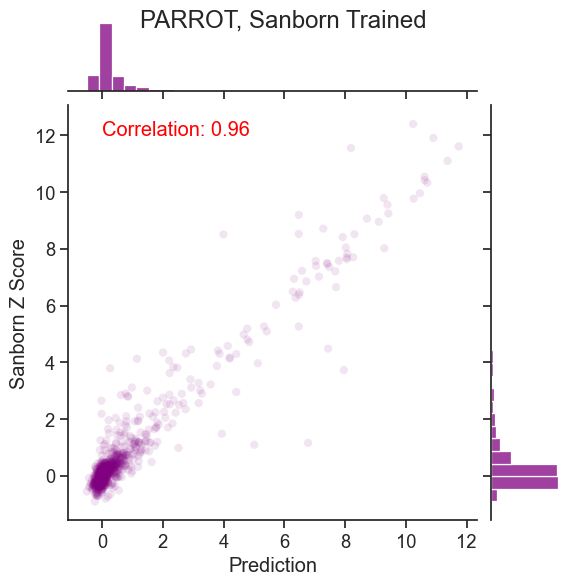

In [110]:
from scipy.stats import pearsonr

g = sns.jointplot(
    data=sanborn_sampled,
    x="parrot_pred",
    y="Z score",
    kind="scatter",
    color="purple",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws = {'edgecolor' : 'none', 'alpha' : 0.1}
)

# Calculate Pearson correlation
correlation, _ = pearsonr(sanborn_sampled["parrot_pred"], sanborn_sampled["Z score"])
plt.text(s = f"Correlation: {correlation:.2f}", x = 0, y = 12, color = 'red')
plt.suptitle("PARROT, Sanborn Trained")

plt.ylabel("Sanborn Z Score")
plt.xlabel("Prediction")

# Running on all TFs

In [15]:
# Run on all lambert TFs
lambert_TFs = pd.read_csv("../data/LambertTFs.csv", index_col = 0)
lambert_TFs["uniprotID"] = lambert_TFs["GeneName"].str.split("|").str[1]
lambert_TFs["TF_length"] = lambert_TFs["ProteinSeq"].str.len()
lambert_TFs

,GeneName,ProteinSeq,uniprotID,TF_length
0,sp|P23511|NFYA_HUMAN,MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVASASG...,P23511,347
1,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,562
2,sp|P31270|HXA11_HUMAN,MDFDERGPCSSNMYLPSCTYYVSGPDFSSLPSFLPQTPSSRPMTYS...,P31270,313
3,sp|P50221|MEOX1_HUMAN,MDPAASSCMRSLQPPAPVWGCLRNPHSEGNGASGLPHYPPTPFSFH...,P50221,254
4,sp|P57073|SOX8_HUMAN,MLDMSEARSQPPCSPSGTASSMSHVEDSDSDAPPSPAGSEGLGRAG...,P57073,446
...,...,...,...,...
1603,sp|P35227|PCGF2_HUMAN,MHRTTRIKITELNPHLMCALCGGYFIDATTIVECLHSFCKTCIVRY...,P35227,344
1604,sp|Q9BS34|ZN670_HUMAN,MDSVSFEDVAVAFTQEEWALLDPSQKNLYRDVMQEIFRNLASVGNK...,Q9BS34,389
1605,sp|P17098|ZNF8_HUMAN,MDPEDEGVAGVMSVGPPAARLQEPVTFRDVAVDFTQEEWGQLDPTQ...,P17098,575
1606,sp|Q9UJW7|ZN229_HUMAN,METLTSRHEKRALHSQASAISQDREEKIMSQEPLSFKDVAVVFTEE...,Q9UJW7,825


In [ ]:
# Run the predictor on TF tiles
# Keep active tiles
# Merge to get intervalse

In [24]:
tiled_TFs = AD_predictor_tools.makeTilingDF("../../SFARI/data/lambert_TFs_10-21-24.fasta")
tiled_TFs

Creating new Tiling DF at  ../data/TilingDFs/lambert_TFs_10-21-24_size_39_space_1_AAs_W,F,Y,M,L,Q.csv
Window Size = 39  and Window spacing = 1
Number of Tiling Windows: 888581


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,39,0,1,0,2,6,1,1,1,3,5,-6
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,40,0,1,0,1,6,1,1,1,3,5,-6
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIR,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,41,0,1,0,1,6,1,1,2,3,4,-4
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRD,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,42,0,1,0,1,6,1,1,2,4,4,-5
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,43,0,1,0,2,6,1,1,2,4,3,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888576,LLTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1630,1669,0,1,1,1,5,2,5,8,2,2,9
888577,LTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1631,1670,0,1,1,1,4,2,5,8,2,2,9
888578,TKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQ,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1632,1671,0,1,1,1,3,3,5,8,2,2,9
888579,KKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1633,1672,0,1,1,1,3,3,5,8,2,2,9


In [25]:
tiled_TFs["padd_pred"] = tiled_TFs["ProteinWindowSeq"].apply(lambda seq: paddle_train_predictor.predict(seq))
tiled_TFs

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,padd_pred
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,39,0,1,0,2,6,1,1,1,3,5,-6,[1.9668984]
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,40,0,1,0,1,6,1,1,1,3,5,-6,[1.6974059]
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIR,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,41,0,1,0,1,6,1,1,2,3,4,-4,[1.1884763]
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRD,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,42,0,1,0,1,6,1,1,2,4,4,-5,[1.6412047]
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,43,0,1,0,2,6,1,1,2,4,3,-4,[1.895335]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888576,LLTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1630,1669,0,1,1,1,5,2,5,8,2,2,9,[-0.07013282]
888577,LTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1631,1670,0,1,1,1,4,2,5,8,2,2,9,[-0.04796788]
888578,TKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQ,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1632,1671,0,1,1,1,3,3,5,8,2,2,9,[0.05794421]
888579,KKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1633,1672,0,1,1,1,3,3,5,8,2,2,9,[-0.019040763]


In [27]:
tiled_TFs.to_csv("../output/tiled_TFs_with_parrot_padd_pred.csv")

In [29]:
tiled_TFs["erij_pred"] = tiled_TFs["ProteinWindowSeq"].apply(lambda seq: erijman_train_predictor.predict(seq))
tiled_TFs

,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,padd_pred,erij_pred
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,39,0,1,0,2,6,1,1,1,3,5,-6,[1.9668984],"[0.9751895, 0.024810443]"
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,40,0,1,0,1,6,1,1,1,3,5,-6,[1.6974059],"[0.9843204, 0.01567965]"
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIR,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,41,0,1,0,1,6,1,1,2,3,4,-4,[1.1884763],"[0.9830169, 0.01698314]"
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRD,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,42,0,1,0,1,6,1,1,2,4,4,-5,[1.6412047],"[0.98094946, 0.01905053]"
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,43,0,1,0,2,6,1,1,2,4,3,-4,[1.895335],"[0.97274613, 0.027253896]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888576,LLTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1630,1669,0,1,1,1,5,2,5,8,2,2,9,[-0.07013282],"[0.98760617, 0.012393865]"
888577,LTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1631,1670,0,1,1,1,4,2,5,8,2,2,9,[-0.04796788],"[0.99040896, 0.009591055]"
888578,TKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQ,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1632,1671,0,1,1,1,3,3,5,8,2,2,9,[0.05794421],"[0.99212974, 0.007870268]"
888579,KKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1633,1672,0,1,1,1,3,3,5,8,2,2,9,[-0.019040763],"[0.99438375, 0.005616259]"


In [30]:
tiled_TFs.to_csv("../output/tiled_TFs_with_both_parrot_pred.csv")